In [105]:
from HeaderP import *
from astropy.timeseries import LombScargle

def pf(lctime, lcmags, P):
    
    t_fold=(lctime-np.median(lctime))-np.round((lctime-np.median(lctime))/P)*P
    
    """plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.plot(lctime,  lcmags, 'ko')   
    plt.subplot(1,2,2)
    plt.plot(t_fold,  lcmags, 'ko')   
    plt.title('Prot = %.2f'%P, fontsize=25)"""
    return t_fold


In [121]:
df = pd.read_csv('VariRotationModulation_000000-003111.csv',skiprows=513)
#df.columns
df

#     ucd: stat.fit.chi2
solution_id        source_id         num_segments segments_start_time                                segments_end_time                                  segments_colour_mag_intercept      segments_colour_mag_intercept_error segments_colour_mag_slope             segments_colour_mag_slope_error      segments_correlation_coefficient        segments_correlation_significance       num_outliers outliers_time                                      segments_rotation_period                           segments_rotation_period_error           segments_rotation_period_fap               best_rotation_period best_rotation_period_error segments_g_unspotted            segments_g_unspotted_error               segments_bp_unspotted           segments_bp_unspotted_error              segments_rp_unspotted            segments_rp_unspotted_error              g_unspotted g_unspotted_error bp_unspotted bp_unspotted_error rp_unspotted rp_unspotted_error segments_g_cos_term                      segments_g_cos_term_error                segments_g_sin_term                        segments_g_sin_term_error                segments_g_a0_term                segments_g_a0_term_error                 segments_bp_cos_term                     segments_bp_cos_term_error               segments_bp_sin_term                      segments_bp_sin_term_error               segments_bp_a0_term              segments_bp_a0_term_error                segments_rp_cos_term                        segments_rp_cos_term_error               segments_rp_sin_term                        segments_rp_sin_term_error               segments_rp_a0_term              segments_rp_a0_term_error                segments_g_activity_index             segments_g_activity_index_error          segments_bp_activity_index            segments_bp_activity_index_error         segments_rp_activity_index            segments_rp_activity_index_error         max_activity_index_g max_activity_index_g_error segments_bp_rp_corr_coeff              segments_bp_rp_corr_signif               segments_bp_rp_intercept         segments_bp_rp_intercept_error     segments_bp_rp_slope                     segments_bp_rp_slope_error            segments_model_reference_time                      segments_g_chi_square             segments_bp_chi_square                    segments_rp_chi_square
375316653866487564 11964580592929024 3            [1710.8627614637849,1733.9879686681977,1710.862... [1827.1116762355873,1838.8660075505068,2624.667... [3.8907843,5.456907,8.921698]      [5.696498,5.3543916,2.9866393]      [-0.15718774,-0.26410553,-0.5006313]  [0.38876605,0.36541837,0.20379743]   [-0.08788946,-0.15229307,-0.3701885]    [0.6900623,0.47744823,0.01871037]       5            [1734.2385128124934,1736.4901317574145,1736.564... [0.9936118616525317,0.9938220306806606,14.83923... [7.984827E-6,9.816342E-6,4.5524986E-4]   [0.0086874515,0.011215904,0.012438616]     0.9937169461665961   1.4861194E-4               [14.647096,14.647096,14.645926] [0.0012875127,0.0012875127,0.008685217]  [15.397572,15.397572,15.397141] [0.005596506,0.005596506,0.0056269383]   [13.812814,13.812814,13.813257]  [0.0035110838,0.0035110838,0.0035023768] 14.645926   0.008685217       15.397141    0.0056269383       13.813257    0.0035023768       [0.003681388,0.0037054976,0.0019630606]  [6.397289E-4,7.704196E-4,7.8865746E-4]   [-0.0020965438,-0.0021972214,0.0061777066] [6.9178216E-4,6.1211304E-4,6.740098E-4]  [14.652728,14.652807,14.658262]   [4.6537278E-4,4.956383E-4,5.235071E-4]   [0.0028355294,0.00198954,7.249306E-4]    [0.002474043,0.0022608163,6.8409916E-4]  [-0.001614829,-0.0011797227,0.0022813398] [0.0014089631,0.0013405795,0.0021528443] [15.3985815,15.398146,15.399652] [0.0017969874,0.0016279684,0.001721755]  [0.0035109194,0.0031371894,0.0014297054]    [0.0024455804,0.0023596107,7.1618235E-4] [-0.0019994623,-0.0018602359,0.0044992496]  [0.0013927537,0.0013991608,0.0022538092] [13.811628,13.811552,13.815927]  [0.0017842493,0.0017011865,0

In [98]:
max(df['n_transits'])

60

In [99]:
htran = df.loc[df['n_transits']==max(df['n_transits'])]

In [100]:
time = htran['g_transit_time'].values[0].split('[')[1].split(']')[0]
mag = htran['g_transit_flux'].values[0].split('[')[1].split(']')[0]
flag = htran['photometry_flag_noisy_data']==False
print(sum(flag))
flag = flag&(htran['variability_flag_g_reject']==True)
print(sum(flag))

0
0


In [101]:
time = [float(i) for i in time.split(',') if not np.isnan(float(i))]
mag = [float(i) for i in mag.split(',') if not np.isnan(float(i))]



16.037357696979438


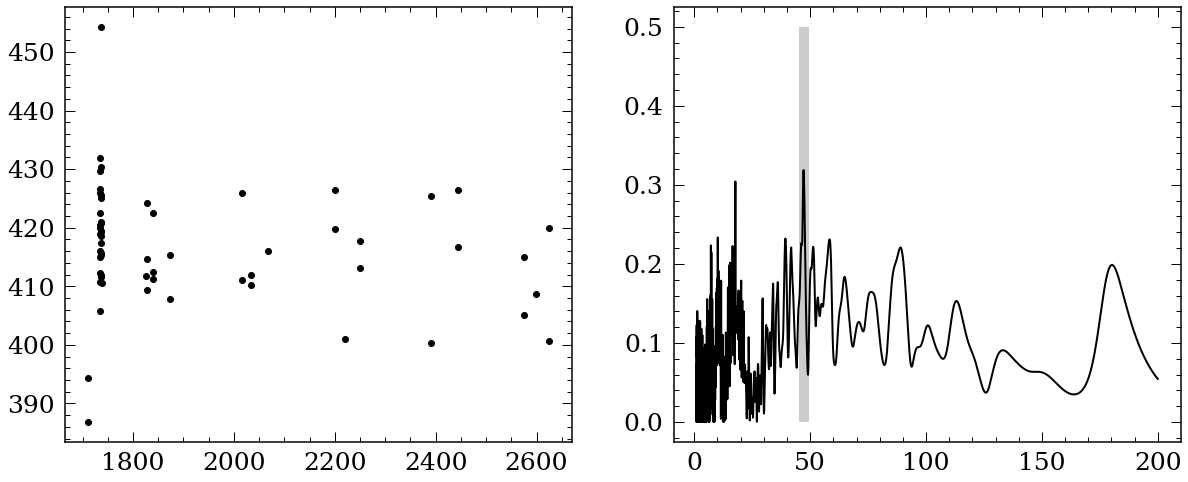

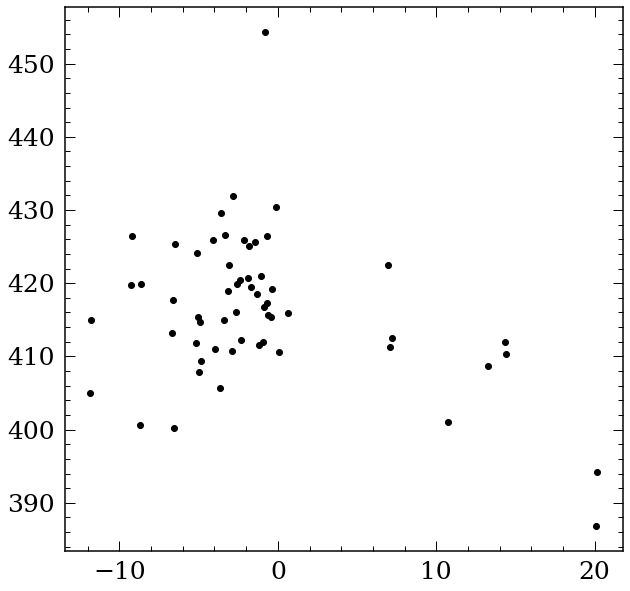

In [102]:
print(np.mean(np.diff(time)))
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(time, mag, 'ko')

# fold on LS
plt.subplot(1,2,2)
frequency, power = LombScargle(time * u.day, mag).autopower(minimum_frequency=0.005*1/u.day,
                                                            maximum_frequency=1*1/u.day,
                                                            samples_per_peak=50)
prots = 1/frequency

m = prots
plt.plot(prots, power, 'k-')
plt.vlines(prots[np.argmax(power)].value, ymin = 0, ymax = 0.5, color='k', 
           alpha=0.2, linewidth=10)
P = prots[np.argmax(power)]

# fold on period
tfold = pf(time, mag, P)
plt.figure()
plt.plot(tfold, mag, 'ko')

In [88]:
prots[np.argmax(power)].value

47.14279989650869

900